In [309]:
#Step 1. Data normalisation

In [310]:
import pandas as pd

In [311]:
# Loading datasets
train_df = pd.read_csv("lec11data/train.csv")
test_df = pd.read_csv("lec11data/test.csv")

In [312]:
#Let`s have a look on dataset
train_df = pd.read_csv("lec11data/train.csv")
print(train_df.shape)
print("---------------")
print(train_df['Sex'].value_counts())
train_df.head()

(891, 12)
---------------
Sex
male      577
female    314
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [313]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [314]:
#Train dataset normalisation
train_clean = train_df.copy()

In [315]:
#Checking for missing values and filling them
print(train_df.isnull().sum())
train_clean["Age"] = train_clean["Age"].fillna(train_clean["Age"].median())
train_clean["Embarked"] = train_clean["Embarked"].fillna(train_clean["Embarked"].mode()[0])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [316]:
# Coding Sex
train_clean["Sex"] = train_clean["Sex"].map({"male": 0, "female": 1})

In [ ]:
# One-hot coding for Embarked
train_clean = pd.get_dummies(train_clean, columns=["Embarked"], drop_first=False)

In [318]:
# Deletting columns we are not gonna use
train_clean.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [319]:
#Normalising test dataset
test_clean = test_df.copy()

In [320]:
# Filling missing columns
test_clean["Age"] = test_clean["Age"].fillna(train_df["Age"].median())
test_clean["Fare"] = test_clean["Fare"].fillna(train_df["Fare"].median())
test_clean["Embarked"] = test_clean["Embarked"].fillna(train_df["Embarked"].mode()[0])

In [321]:
# Coding Sex
test_clean["Sex"] = test_clean["Sex"].map({"male": 0, "female": 1})

In [322]:
# One-hot Coding for Embarked
test_clean = pd.get_dummies(test_clean, columns=["Embarked"], drop_first=False)

In [323]:
# Deletting columns we are not gonna use
test_clean.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [324]:
# Adding column "Survived" for easier compatibility 
for col in train_clean.columns:
    if col not in test_clean.columns and col != "Survived":
        test_clean[col] = 0

In [325]:
# Order the columns in test_clean according to train_clean (except 'Survived')
test_clean = test_clean[train_clean.drop(columns=["Survived"]).columns]

In [326]:
# Checking results
print("Train shape:", train_clean.shape)
print("Test shape:", test_clean.shape)

Train shape: (891, 11)
Test shape: (418, 10)


In [327]:
#Part 2. Data analysis.

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [329]:
# Style.
sns.set(style="whitegrid")

In [330]:
# Copy with text labels
train_clean_labeled = train_clean.copy()
train_clean_labeled["Sex"] = train_clean_labeled["Sex"].map({0: "Man", 1: "Woman"})


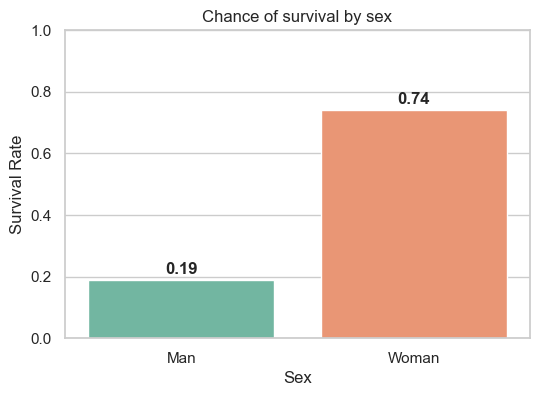

In [331]:
#Barchars: chance of survival by sex
sex_survival = train_clean_labeled.groupby("Sex")["Survived"].mean().reset_index()
sex_survival["Survived"] = sex_survival["Survived"].round(2)

plt.figure(figsize=(6, 4))
bar = sns.barplot(data=sex_survival, x="Sex", y="Survived", palette="Set2")
for i, row in sex_survival.iterrows():
    bar.text(i, row.Survived + 0.02, f"{row.Survived:.2f}", ha="center", fontweight='bold')
plt.title("Chance of survival by sex")
plt.ylim(0, 1)
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.show()

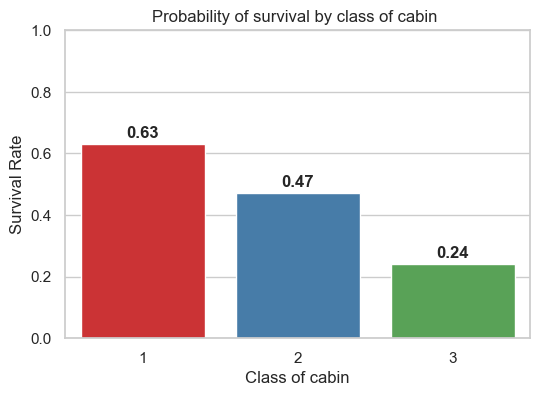

In [332]:
# Class of cabin 
pclass_survival = train_clean_labeled.groupby("Pclass")["Survived"].mean().reset_index()
pclass_survival["Survived"] = pclass_survival["Survived"].round(2)

plt.figure(figsize=(6, 4))
bar = sns.barplot(data=pclass_survival, x="Pclass", y="Survived", palette="Set1")
for i, row in pclass_survival.iterrows():
    bar.text(i, row.Survived + 0.02, f"{row.Survived:.2f}", ha="center", fontweight='bold')
plt.title("Probability of survival by class of cabin ")
plt.ylim(0, 1)
plt.ylabel("Survival Rate")
plt.xlabel("Class of cabin")
plt.show()


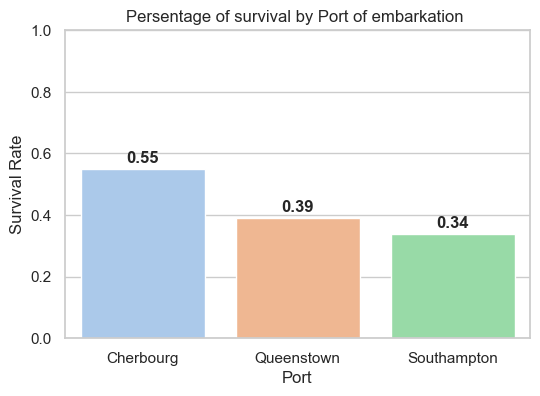

In [333]:
# Port of embarkation
# Creating new dataframe with ports
embarked_map = {
    "Embarked_C": "Cherbourg",
    "Embarked_Q": "Queenstown",
    "Embarked_S": "Southampton"
}

embarked_data = []
for col in ["Embarked_C", "Embarked_Q", "Embarked_S"]:
    if col in train_clean_labeled.columns:
        rate = train_clean_labeled[train_clean_labeled[col] == 1]["Survived"].mean()
        embarked_data.append({
            "Port": embarked_map[col],
            "Survived": round(rate, 2)
        })

embarked_df = pd.DataFrame(embarked_data)

plt.figure(figsize=(6, 4))
bar = sns.barplot(data=embarked_df, x="Port", y="Survived", palette="pastel")
for i, row in embarked_df.iterrows():
    bar.text(i, row.Survived + 0.02, f"{row.Survived:.2f}", ha="center", fontweight='bold')
plt.title("Persentage of survival by Port of embarkation ")
plt.ylim(0, 1)
plt.ylabel("Survival Rate")
plt.xlabel("Port")
plt.show()


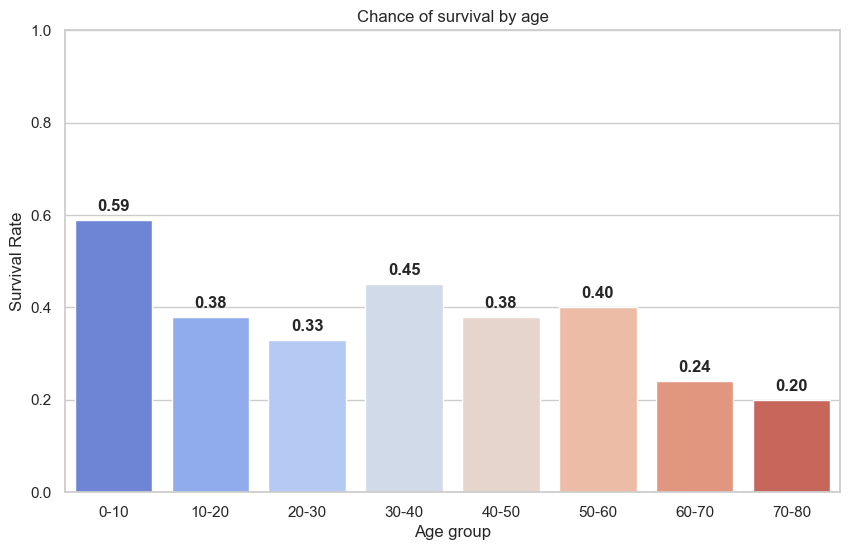

In [334]:
# Chance of survival by age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80"]
train_clean_labeled["AgeGroup"] = pd.cut(train_clean_labeled["Age"], bins=bins, labels=labels, include_lowest=True)

agegroup_survival = train_clean_labeled.groupby("AgeGroup")["Survived"].mean().reset_index()
agegroup_survival["Survived"] = agegroup_survival["Survived"].round(2)

plt.figure(figsize=(10, 6))
bar = sns.barplot(data=agegroup_survival, x="AgeGroup", y="Survived", palette="coolwarm")
for i, row in agegroup_survival.iterrows():
    bar.text(i, row.Survived + 0.02, f"{row.Survived:.2f}", ha="center", fontweight='bold')
plt.title("Chance of survival by age")
plt.ylim(0, 1)
plt.ylabel("Survival Rate")
plt.xlabel("Age group")
plt.show()


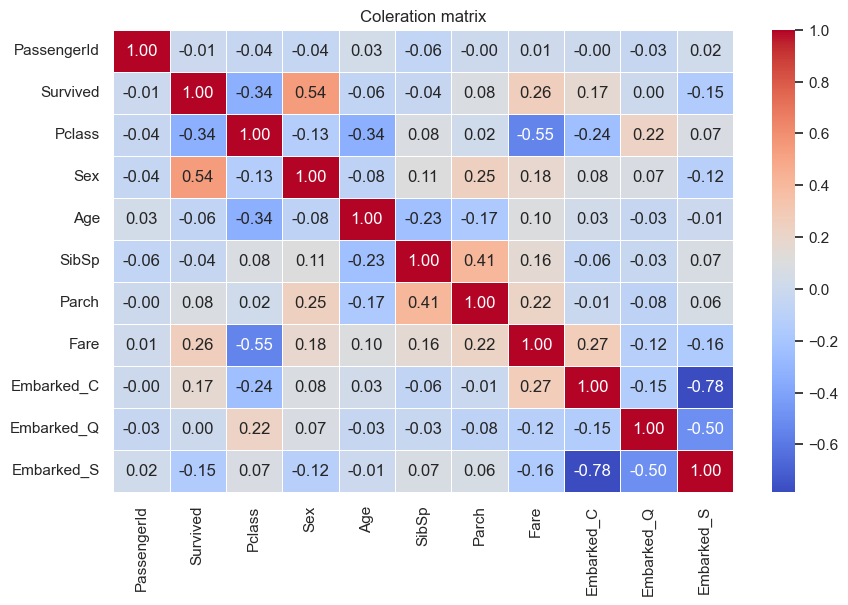

In [335]:
#Coleration matrix
plt.figure(figsize=(10, 6))
corr = train_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Coleration matrix")
plt.show()

In [336]:
#Part 3. Creation of NN and prediction of results

In [337]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [338]:
y = train_clean["Survived"]

In [339]:
#Features for model
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare",
            "Embarked_Q", "Embarked_S"]

In [340]:
X = train_clean[features]
X_test = test_clean[features]

In [341]:
# Initializing and training the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [342]:
#Prediction
predictions = model.predict(X_test)

In [343]:
#Submission
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

print("✅ Submission file saved!")

✅ Submission file saved!


In [ ]:
#I got 77% !! yay

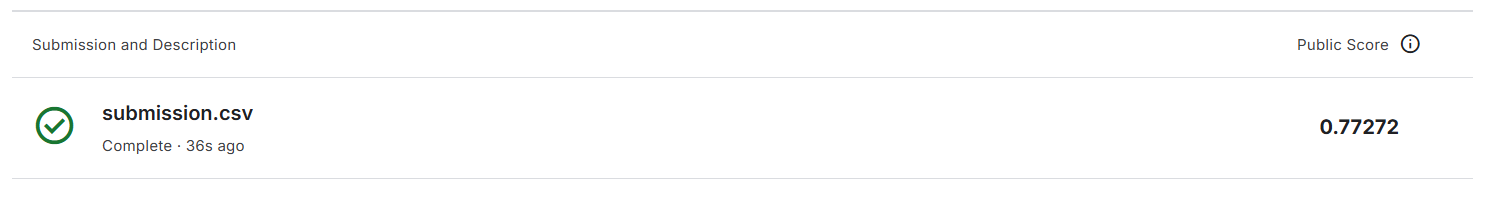